# Prerequisiti


## Kaggle
Come prerequisto per l'esecuzione del notebook abbiamo inanzitutto l'installazione e la configurazione della API di kaggle per poter effettuare il download del dataset che andremo ad utilizzare.
Una volta installata l'API bisogna effettuare l'upload del file contenente la chiave per accedere a Kaggle utilizzato per autenticare la API.

---
*Il file di autorizzazione si trova nella repository insieme al notebook sotto il nome di kaggle.json*


In [12]:
#installiamo kaggle
!pip install kaggle 


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --save


In [3]:
#importiamo il json file per l'autenticazione con kaggle
from google.colab import files
from os import files
files.upload()

ImportError: cannot import name 'files' from 'os' (/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/os.py)

In [8]:
#spostiamo il file json di auth dove l'API di Kaggle lo andrà a cercare
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
#effettuiamo il download del dataset
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

zsh:1: command not found: kaggle


In [6]:
#unzippiamo il contenuto del dataset appena scaricato
import zipfile
zip_ref = zipfile.ZipFile('new-plant-diseases-dataset.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

##LivelossPlot
Dopo aver installato Kaggle ed aver scaricato il dataset, procediamo con l'installazione di livelossplot, una libreria che integra una callback (da inserire quando si effettua il train del modello) che al termine di ogni epoca del training disegna un grafico mostrando i valori di loss e accuracy del modello. 

---


[Livelossplot Github](https://github.com/stared/livelossplot)

In [7]:
#installiamo livelossplot
!pip install livelossplot

# Data Loading
tf.keras ha al suo interno una funzione di preprocessing che riesce a creare per ogni cartella che trova a partire dalla root che gli viene data un dataset che contiene batch di immagini presi dalle sottocartelle. Ogni immagine avrà una label presa dalla cartella in cui si trova in modo da poter distinguere ad esempio le foglie di mela da quelle di pomodoro.

In [8]:
#Definiamo tutti gli import che utilizzeremo
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
## Definiamo delle costanti per creare i nostri dataset
BATCH_SIZE = 100
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
## carichiamo il dataset di training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'files/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    seed=42, #parametro utilizzato per effettuare uno shuffle del dataset
    image_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 70295 files belonging to 38 classes.


In [11]:
## carichiamo il dataset di validation
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    'files/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    seed=42, #parametro utilizzato per effettuare uno shuffle del dataset
    image_size= (IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 17572 files belonging to 38 classes.


In [12]:
#recuperiamo la lista delle classi che abbiamo individuato nel dataset di training
class_names = train_ds.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

# Analisi visiva dei dataset
Now that our data has been easily loaded in, the next step is to visualize our images. This helps us understand what is being used as an input for our model. It also serves as a check to see if our images have been loaded in correctly.

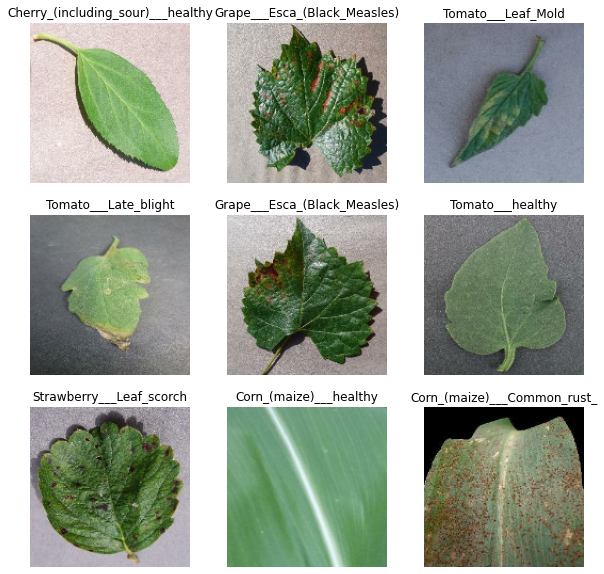

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

# Definiamo il modello di ML
Andremo adessso a definire il modello della nostra rete neurale, in particolare della nostra rete convoluzionale per il riconoscimento di immagine. Data un immagine la rete dovrà essere in grado di definire a quale classe appartiene. Individuare la classe vuol dire capire il tipo di pianta e se affetta da malattia, il tipo di malattia 

In [14]:
##definiamo la CNN
from tensorflow.keras import layers
model = tf.keras.models.Sequential([ #Corrisponde a uno stack lineare di layer
  layers.BatchNormalization(input_shape=(IMG_HEIGHT, IMG_WIDTH,3)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [15]:
#compiliamo il modello e con la funzione summary mostriamo un breve riepilogo dei vari livelli
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 150, 150, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0

# Alleniamo il modello
Adesso deve essere allenato il modello, utilizzando quelli che sono i dataset di train e di valiation. Useremo anche delle callbacks, in particolare la PlotLossesKerasTF che mostra un grafico che rappresenta le metriche del nostro modello al termine di ogni epoca di training e la callback di EarlyStop per terminare il training del modello prima di convergere


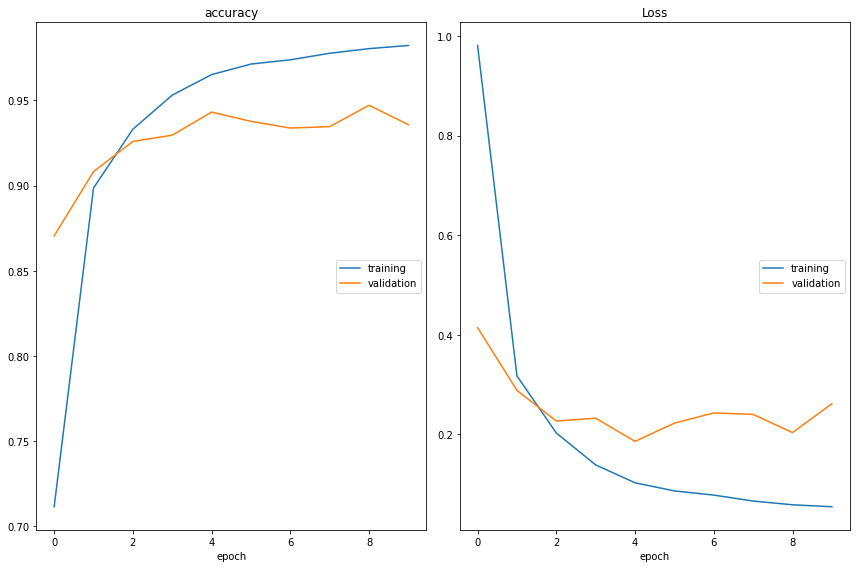

accuracy
	training         	 (min:    0.712, max:    0.982, cur:    0.982)
	validation       	 (min:    0.870, max:    0.947, cur:    0.936)
Loss
	training         	 (min:    0.055, max:    0.981, cur:    0.055)
	validation       	 (min:    0.186, max:    0.414, cur:    0.262)
703/703 [==============================] - 153s 217ms/step - loss: 0.0547 - accuracy: 0.9822 - val_loss: 0.2615 - val_accuracy: 0.9358


In [16]:
## definiamo le callback
from livelossplot import PlotLossesKerasTF
# checkpoint = tf.keras.callbacks.ModelCheckpoint(
#     "model_weights.h5", 
#     monitor='val_accuracy',
#     save_weights_only=True, 
#     mode='max', 
#     verbose=1
# )
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
callbacks = [PlotLossesKerasTF(),early_stop]

## effettuiamo il train
retVal = model.fit(train_ds,validation_data= validation_ds,epochs = 10, callbacks=callbacks)

# Metriche del modello
Procediamo andando ad analizzare la metriche del nostro modello che abbiamo appena allenato, che in parte abbiamo già analizzato con la callback di livelossplot. Inoltre utilizzando un metodo di utility di keras riusciamo poi a mostrare in un diagramma tutti i livelli del nostro modello

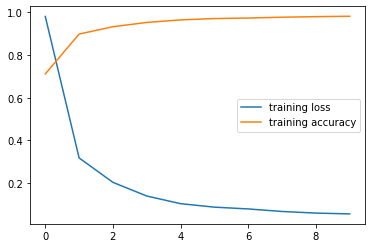

In [17]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

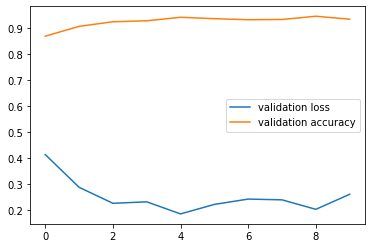

In [18]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

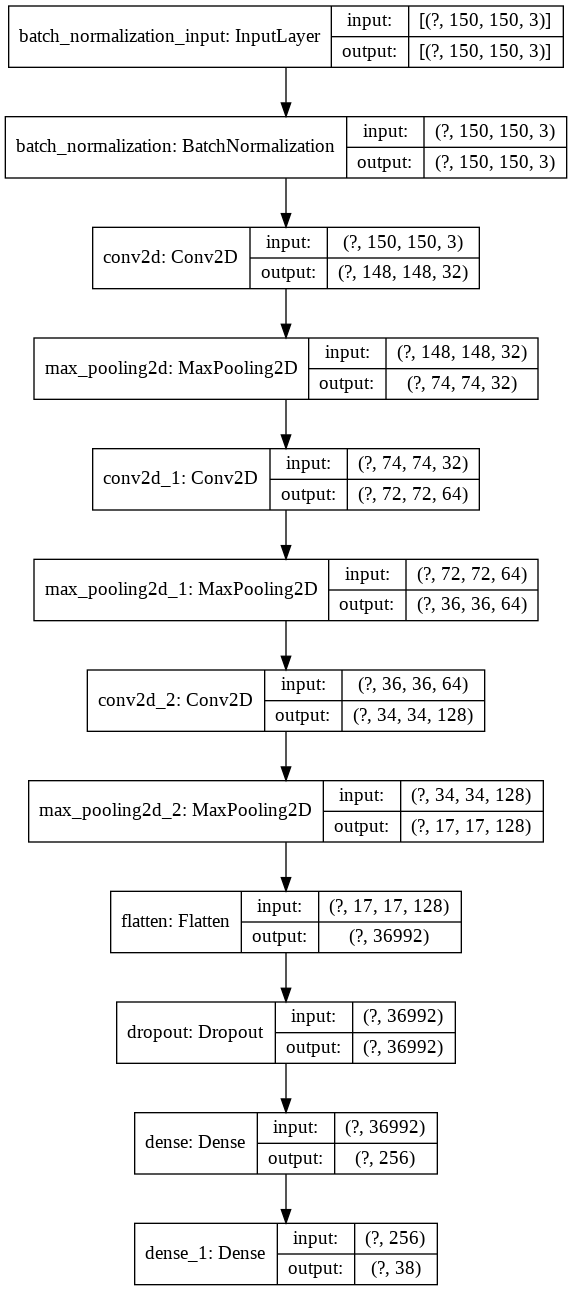

In [19]:
#mostriamo un grafico dei vari livelli
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
model.save('model.h5')

# Testiamo il modello
Per effettuare un semplice test del modello, basta selezionare una qualsiasi immagine presente nella cartella test del dataset e verificare poi la validità della predizione.

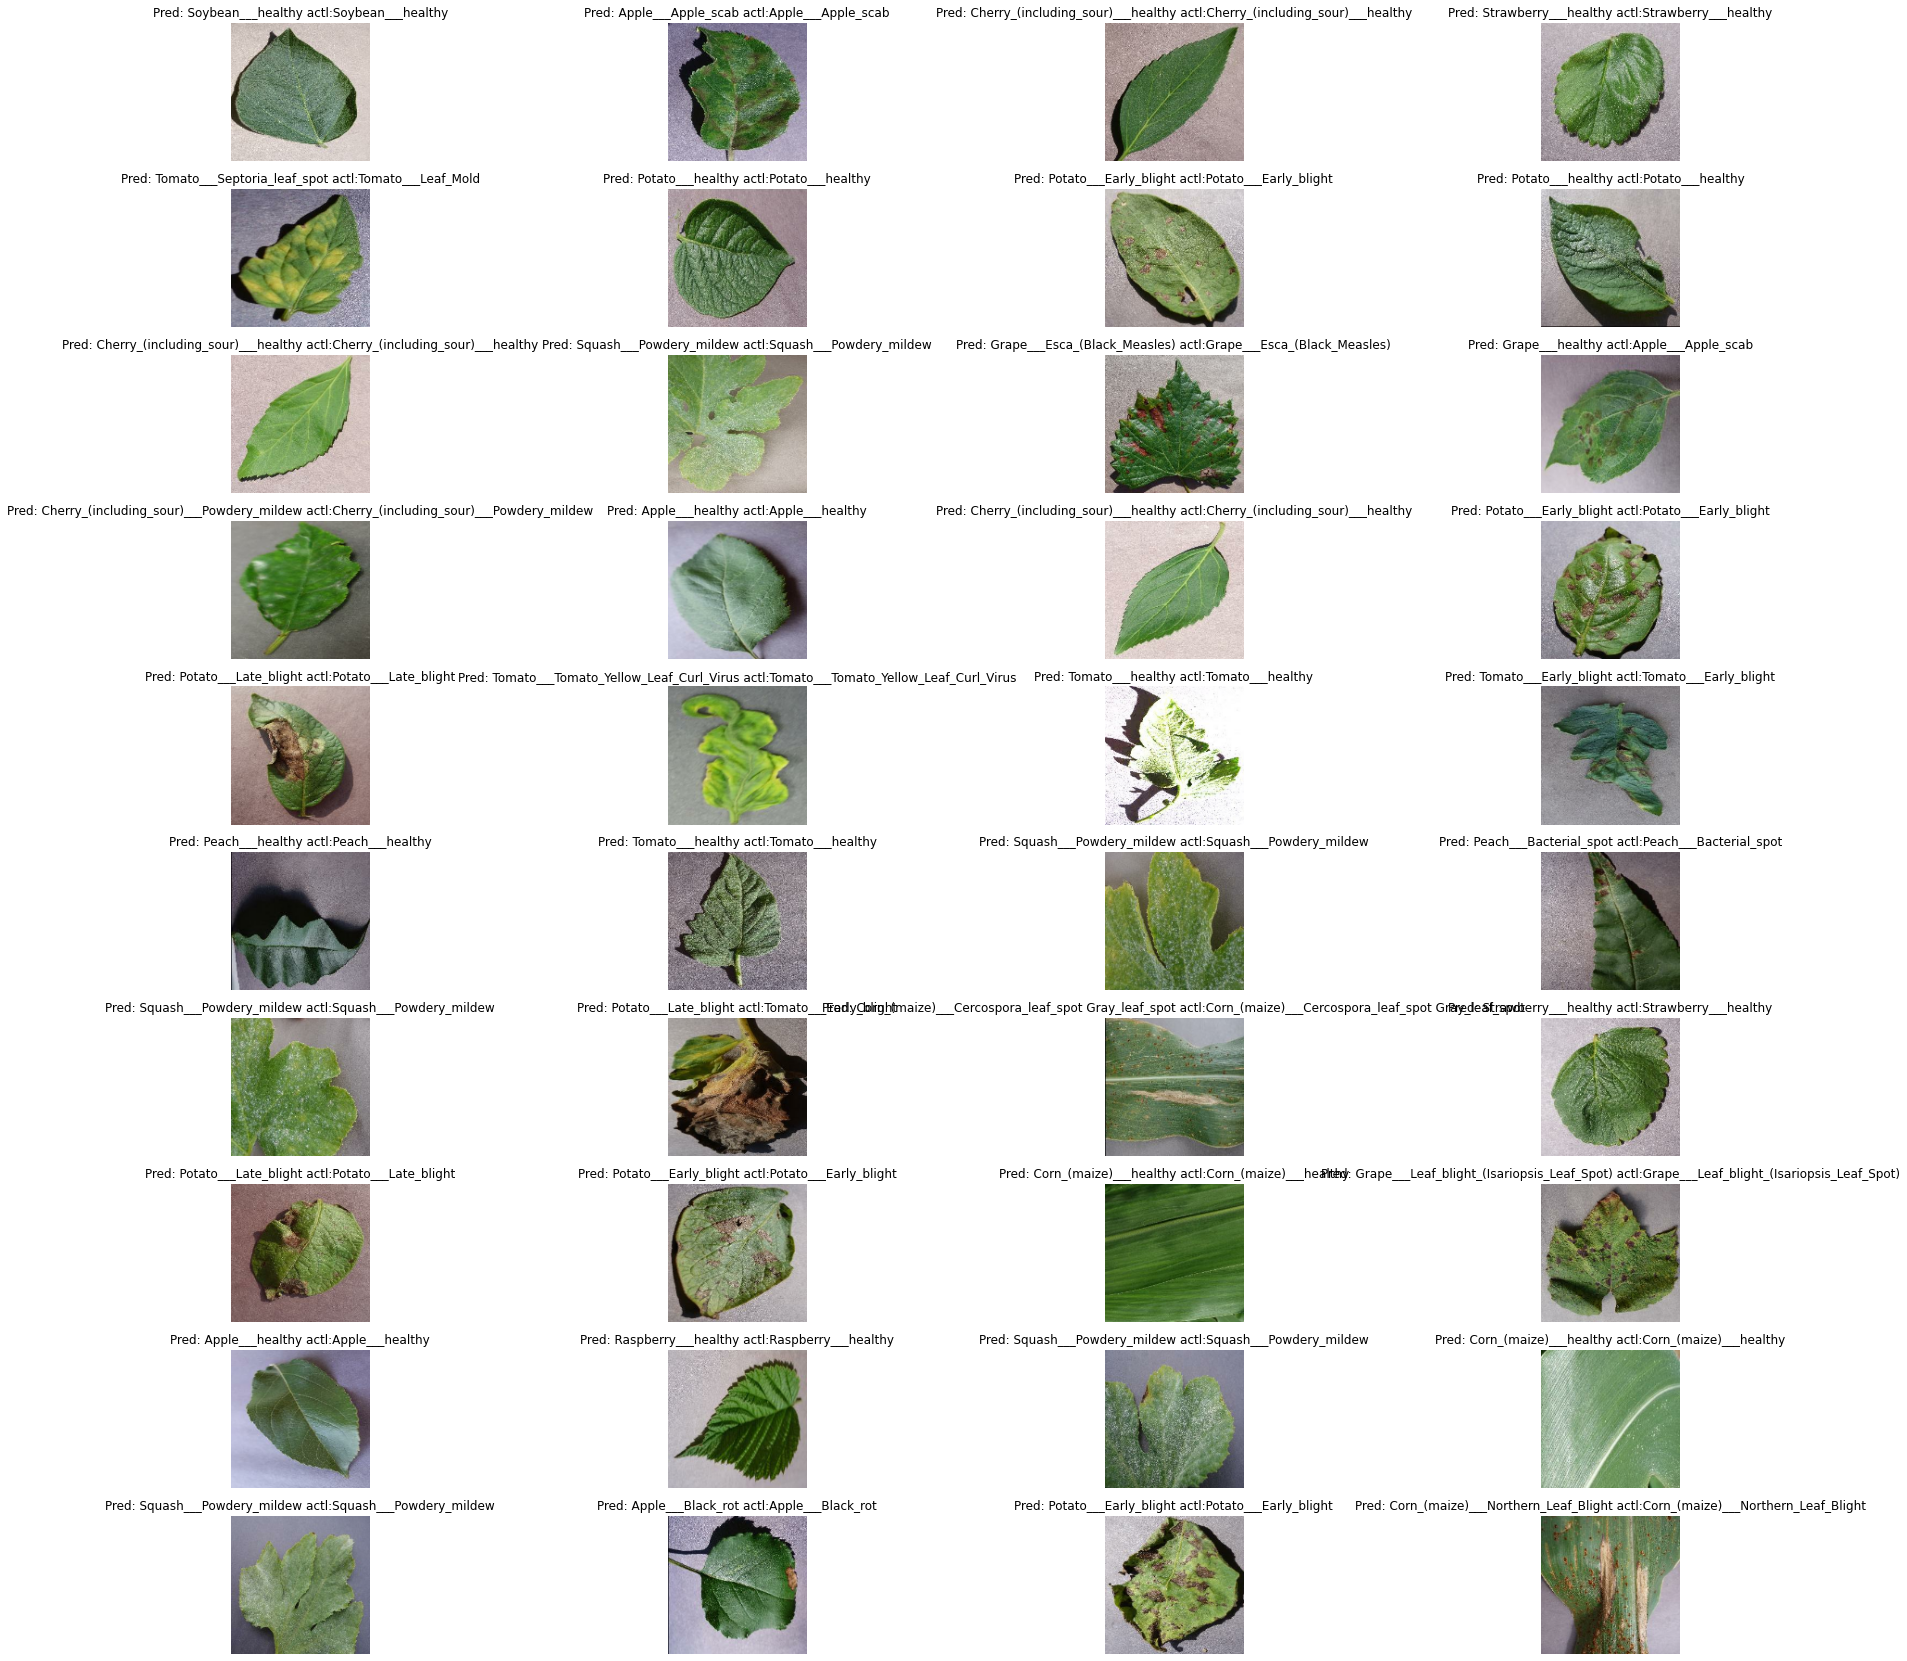

In [20]:

AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [21]:
#Listiamo tutte le immagini di test presenti
!ls files/test/test/

AppleCedarRust1.JPG	PotatoEarlyBlight2.JPG	TomatoEarlyBlight6.JPG
AppleCedarRust2.JPG	PotatoEarlyBlight3.JPG	TomatoHealthy1.JPG
AppleCedarRust3.JPG	PotatoEarlyBlight4.JPG	TomatoHealthy2.JPG
AppleCedarRust4.JPG	PotatoEarlyBlight5.JPG	TomatoHealthy3.JPG
AppleScab1.JPG		PotatoHealthy1.JPG	TomatoHealthy4.JPG
AppleScab2.JPG		PotatoHealthy2.JPG	TomatoYellowCurlVirus1.JPG
AppleScab3.JPG		TomatoEarlyBlight1.JPG	TomatoYellowCurlVirus2.JPG
CornCommonRust1.JPG	TomatoEarlyBlight2.JPG	TomatoYellowCurlVirus3.JPG
CornCommonRust2.JPG	TomatoEarlyBlight3.JPG	TomatoYellowCurlVirus4.JPG
CornCommonRust3.JPG	TomatoEarlyBlight4.JPG	TomatoYellowCurlVirus5.JPG
PotatoEarlyBlight1.JPG	TomatoEarlyBlight5.JPG	TomatoYellowCurlVirus6.JPG


La classe dell'immagine è la seguente:


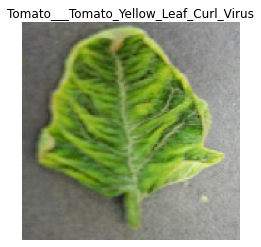

In [31]:
from keras.preprocessing import image
#carichiamo l'immagine dal file system
image_path = "files/test/test/TomatoYellowCurlVirus6.JPG"
# model = tf.keras.models.load_model('model.h5')

#facciamo un resize dell'immagine per essere adeguata al layer di input della rete
imag = image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img = image.img_to_array(imag)
img = np.expand_dims(img, axis=0)

#Invochiamo la funzione predict sul modello dandogli in input l'immagine scelta
prediction = model.predict(img)
ciccio = np.argmax(prediction)
class_name = class_names[ciccio]


#Facciamo un plot dell'immagine con la classe prevista        
print("La classe dell'immagine è la seguente:")
plt.figure(figsize = (4,4))
plt.imshow(imag)
plt.axis('off')
plt.title(class_name)
plt.show()